###### Tasks:

1. Parse info.out files to determine what happened to which planets and when. Chart as a function of time
2. Reading in an ensemble of planetary systems data. Initial and final times, initial vs final semi-major axis distribution (only need to parse first and last lines of file- would throw out planets that die)
    1. what type of graph/chart?

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pylab

data = dict()
planets = []
cols = ['Time','mass','a','e','i','omega','Omega','M','dist_jac','dist_cen','x','y','z','u','v','w']

for run in range (1,101):
    data[run] = dict()
    for sample in range(1,11):
        planet = pd.read_csv(r'/Users/neha/Documents/lanl/hundred all/run'+str(run)+'/PL'+str(sample)+'.el', skiprows=2, delimiter=r"\s+", names=cols) 
        data[run][sample] = dict()
        data[run][sample]['Time'] = [planet['Time'][0], planet['Time'][len(planet['Time']) - 1]]
        data[run][sample]['a'] = [planet['a'][0], planet['a'][len(planet['a']) - 1]]

{1: {'Time': [0.0, 135523.613963], 'a': [0.791928218855, -37.4642639648]}, 2: {'Time': [0.0, 10000000.0], 'a': [1.3898869842500001, 1.23560126788]}, 3: {'Time': [0.0, 1172621.49213], 'a': [1.6928602875, 0.896037003898]}, 4: {'Time': [0.0, 10000000.0], 'a': [2.7775202312, 26.37386826]}, 5: {'Time': [0.0, 119411.362081], 'a': [3.03075487298, -1148.08452727]}, 6: {'Time': [0.0, 10000000.0], 'a': [3.3429558328400004, 2.6463986462799998]}, 7: {'Time': [0.0, 405284.052019], 'a': [2.7935542645599996, 535.2275931]}, 8: {'Time': [0.0, 41026.6940452], 'a': [3.19968334972, -647.33588772]}, 9: {'Time': [0.0, 561642.7104720001], 'a': [5.9382753706199995, -151.067925061]}, 10: {'Time': [0.0, 217878.16564000002], 'a': [5.6345019592900005, -142.871163875]}}
{1: {'Time': [0.0, 19904.1752225], 'a': [0.343418661815, 0.350219217503]}, 2: {'Time': [0.0, 314346.338125], 'a': [0.984990052007, -700.61637274]}, 3: {'Time': [0.0, 64695.41409990001], 'a': [1.2147085764399999, -955.6567489239999]}, 4: {'Time': [0

KeyboardInterrupt: 

In [114]:
runs = {}
labels = ["ejected from system", "solar collision", "planet-planet collision", "surviving planets"]
fates = [0, 0, 0, 0] 

for run in range (1,101):
    numPlanets = 10
    runs[run] = {}
    runs[run]['x'] = [0]
    runs[run]['y'] = [numPlanets]
    
    with open('/Users/neha/Documents/lanl/hundred all/run'+str(run)+'/info.out', 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "PL" in line:
                cols = line.split()
                if "ejected" in line:
                    runs[run]['x'].append(float(cols[3]))
                    numPlanets -= 1
                    runs[run]['y'].append(numPlanets)
                    fates[0] += 1
                elif "collided with the central body" in line:
                    runs[run]['x'].append(float(cols[7]))
                    numPlanets -= 1
                    runs[run]['y'].append(numPlanets)
                    fates[1] += 1
                elif "was hit by" in line:
                    runs[run]['x'].append(float(cols[6]))
                    numPlanets -= 1
                    runs[run]['y'].append(numPlanets)
                    fates[2] += 1
                else:
                    print(cols)
        fates[3] += numPlanets

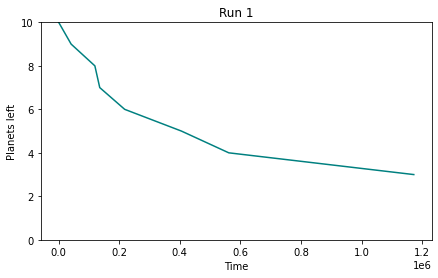

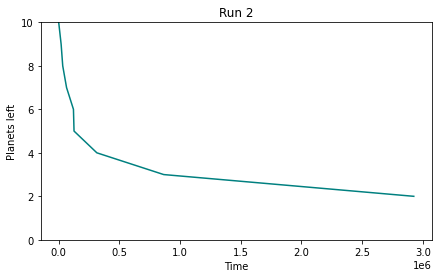

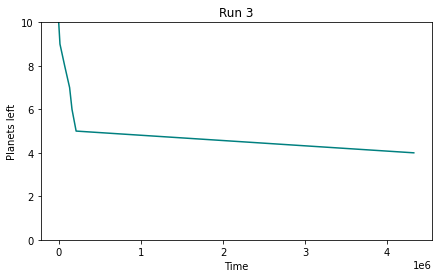

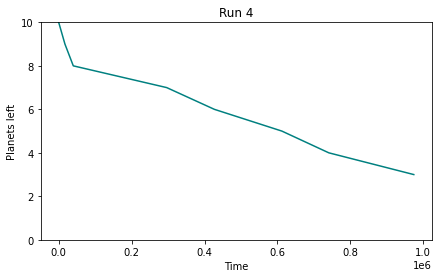

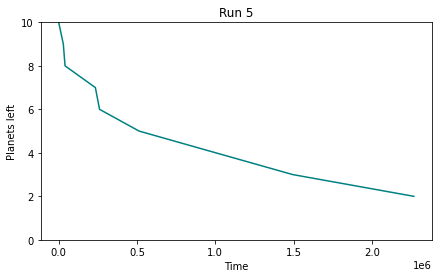

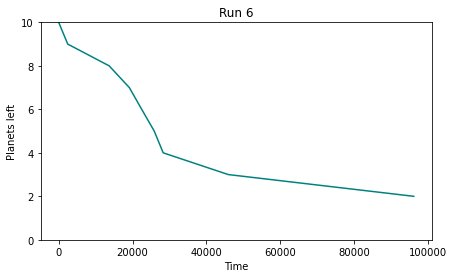

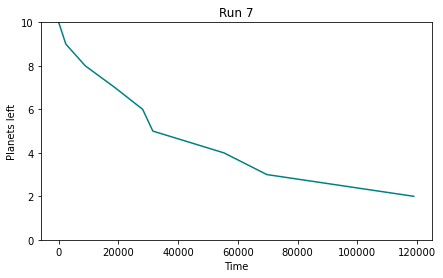

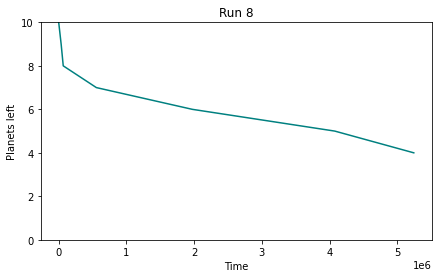

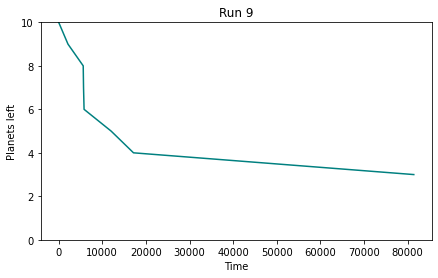

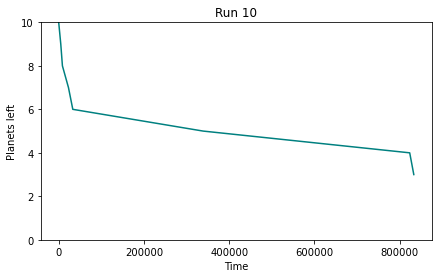

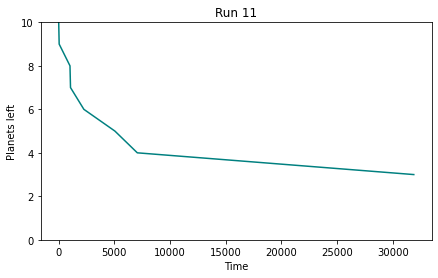

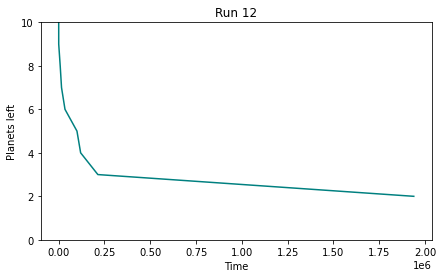

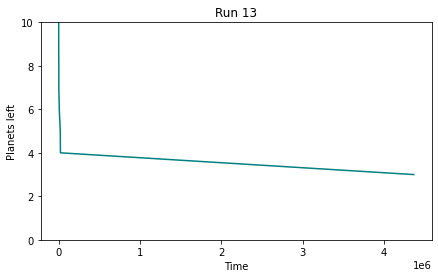

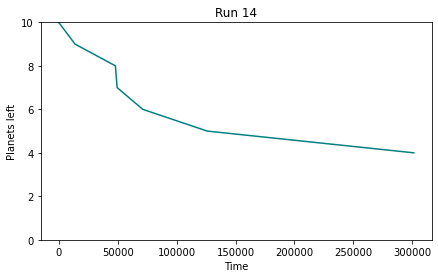

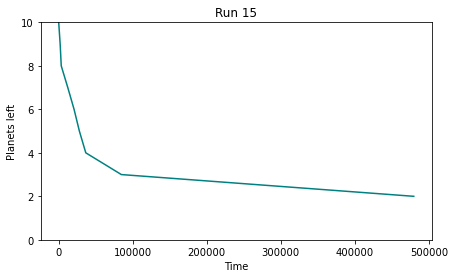

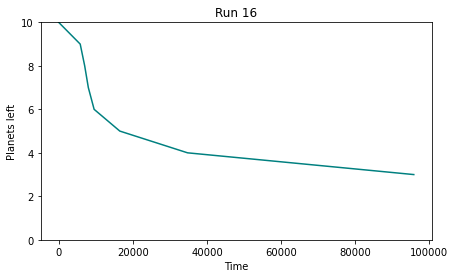

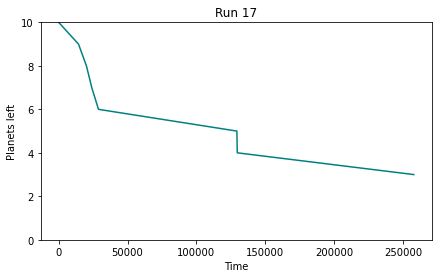

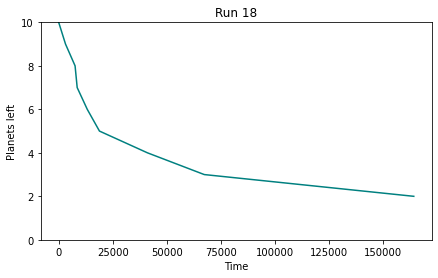

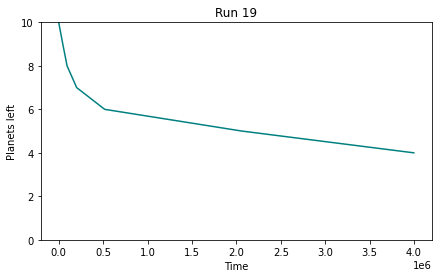

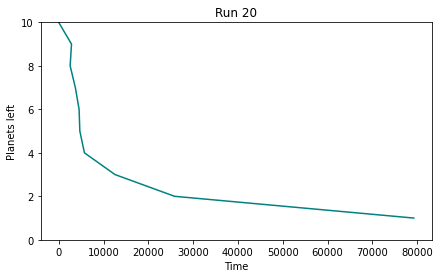

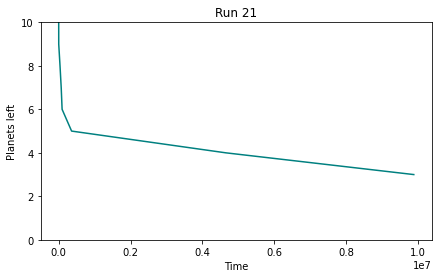

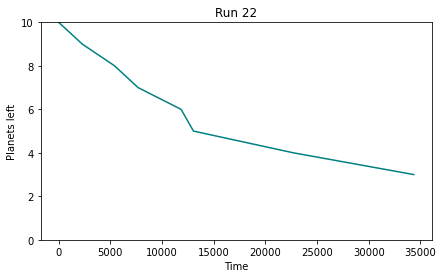

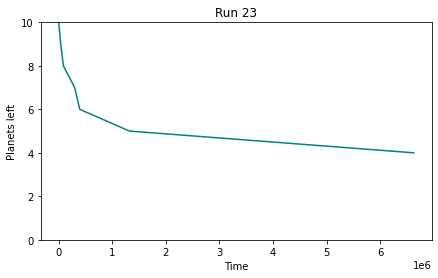

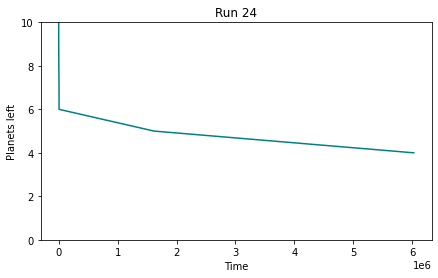

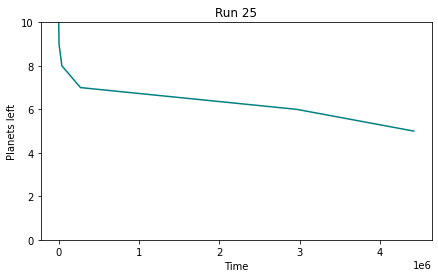

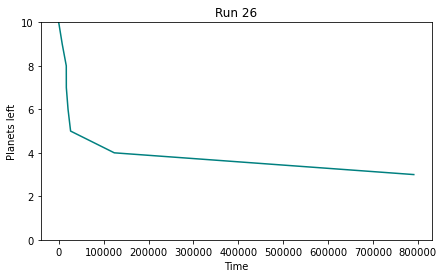

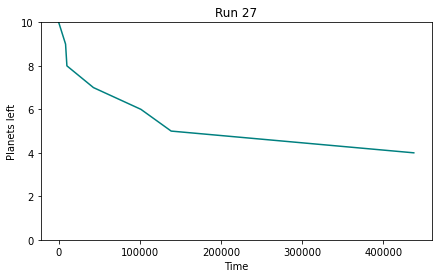

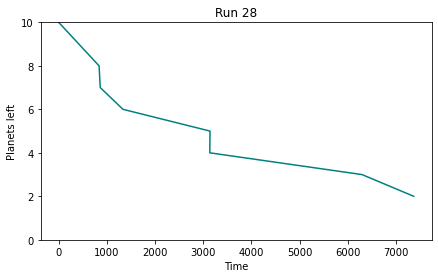

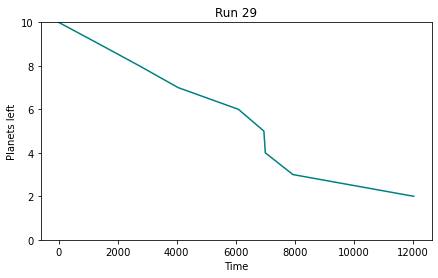

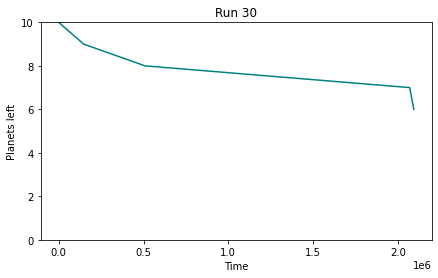

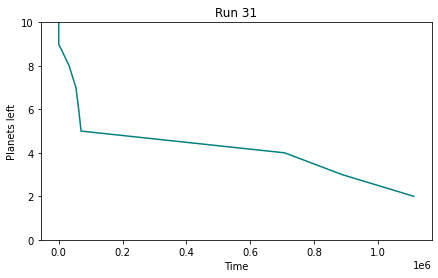

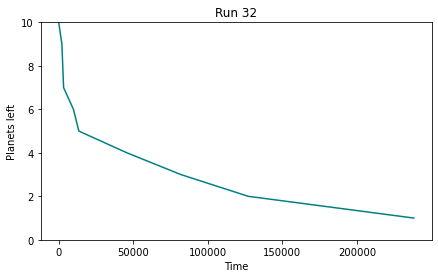

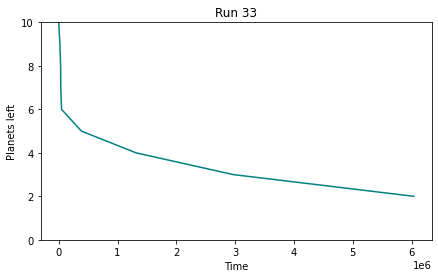

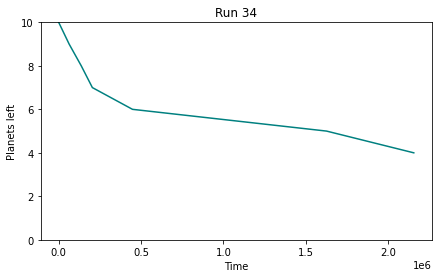

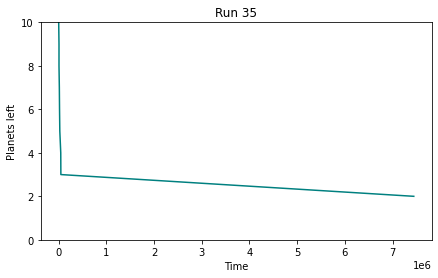

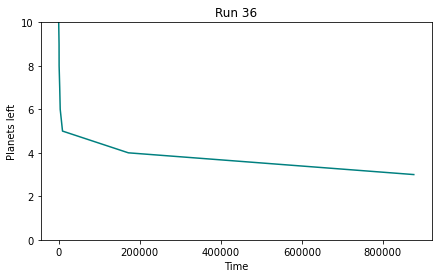

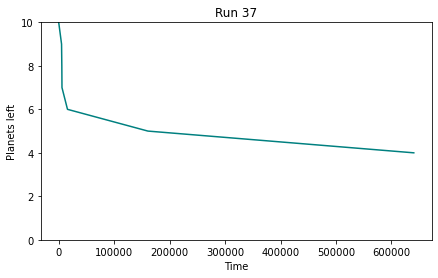

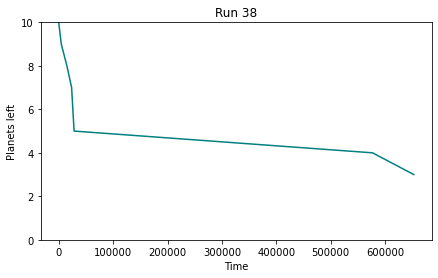

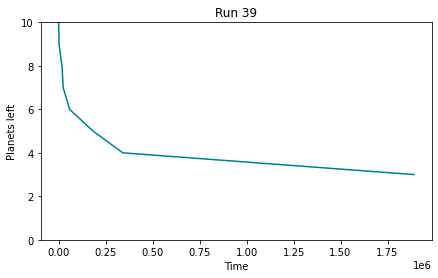

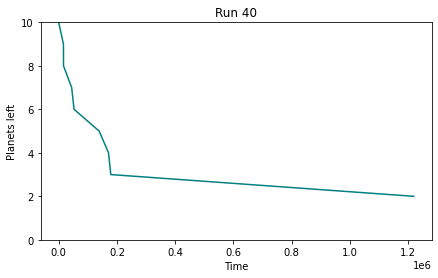

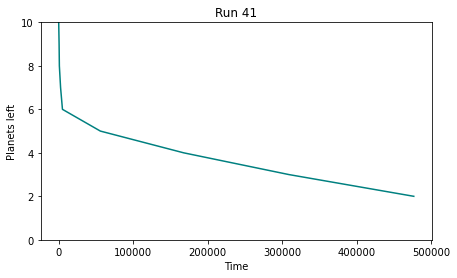

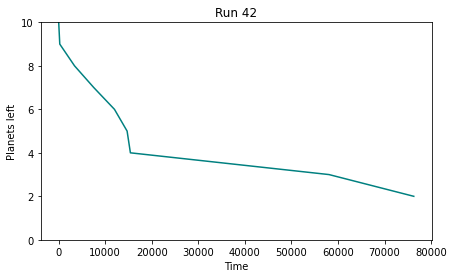

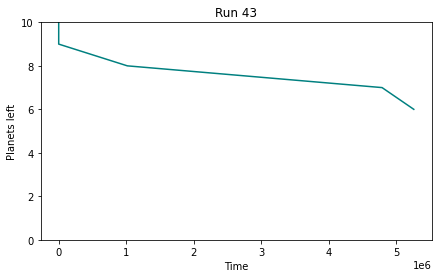

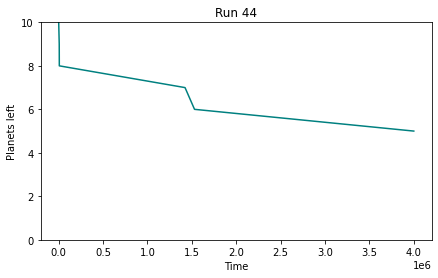

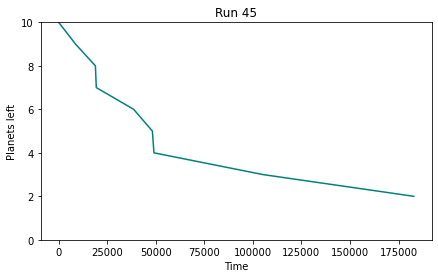

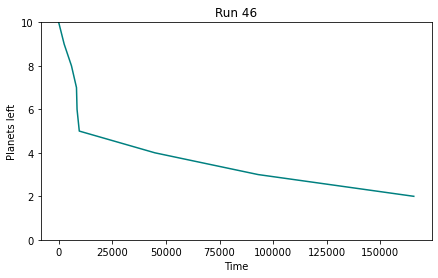

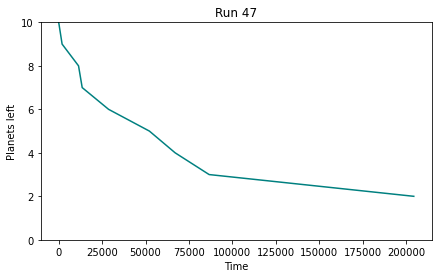

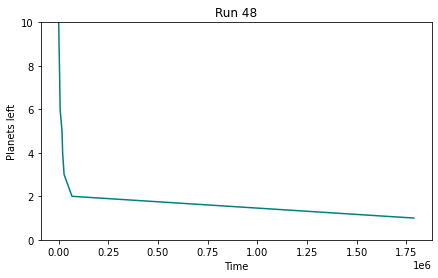

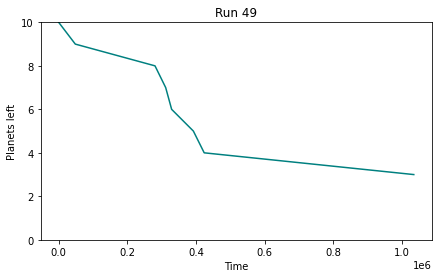

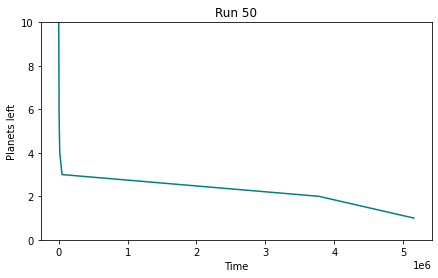

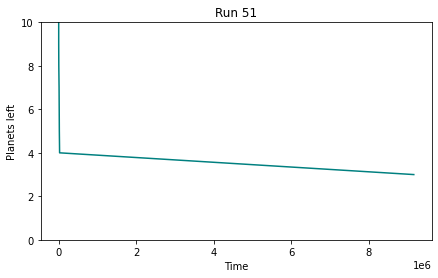

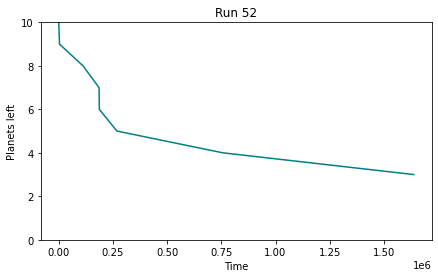

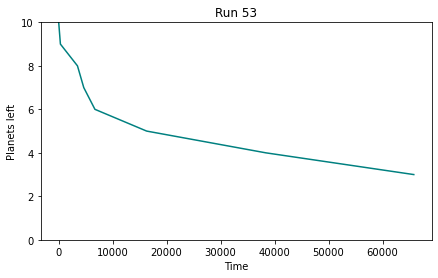

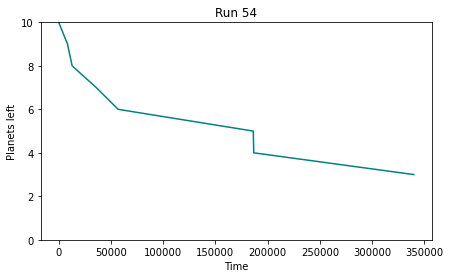

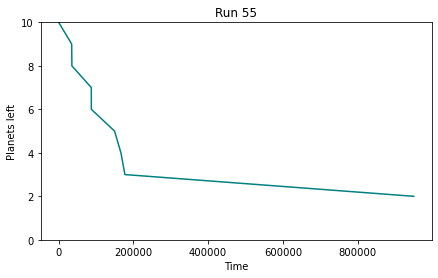

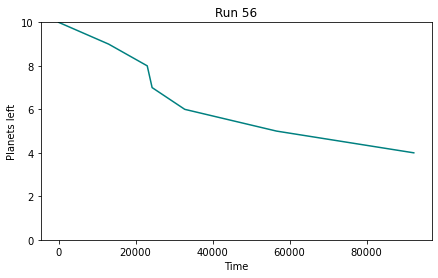

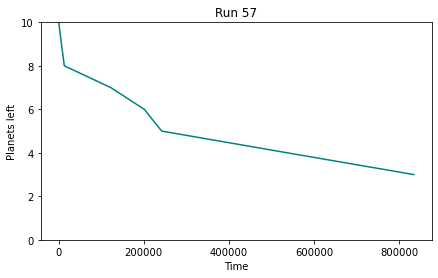

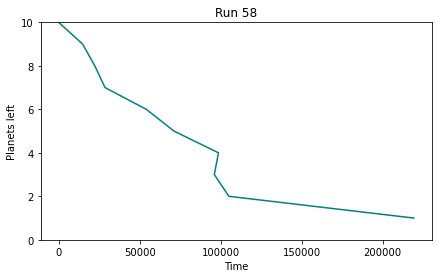

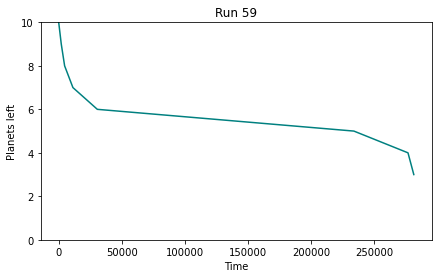

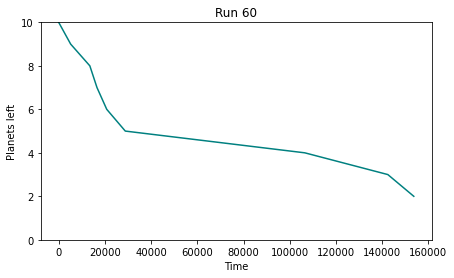

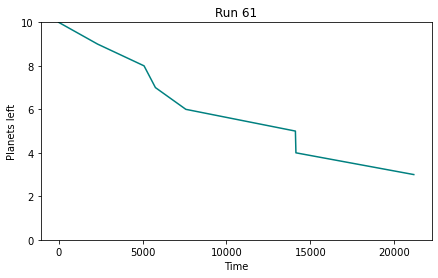

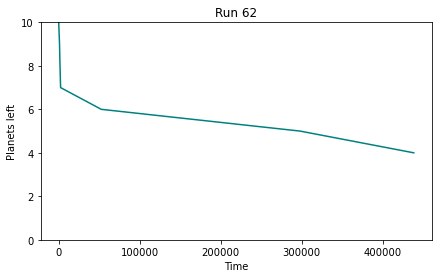

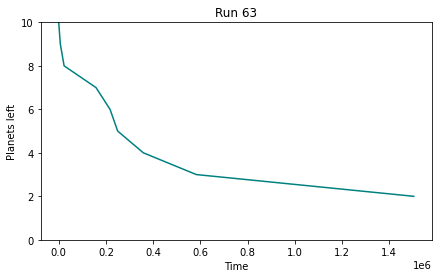

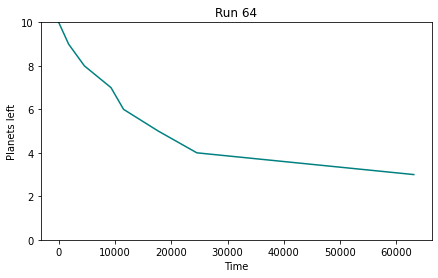

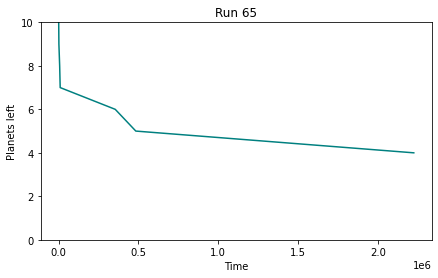

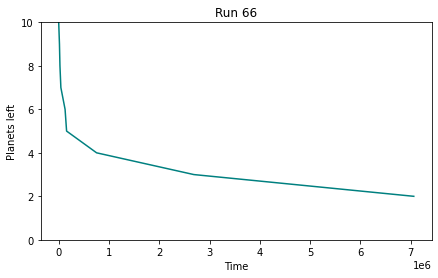

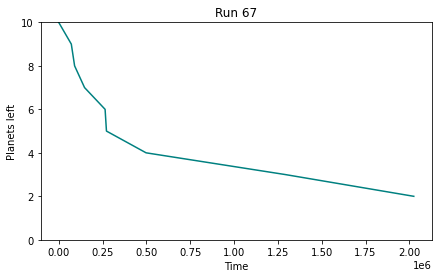

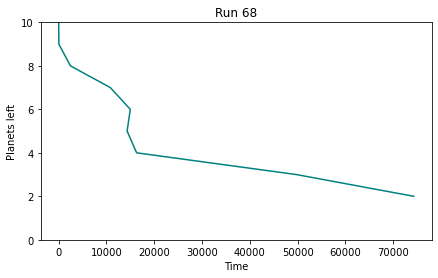

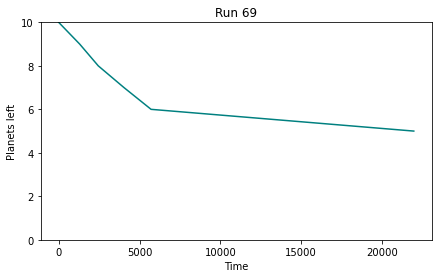

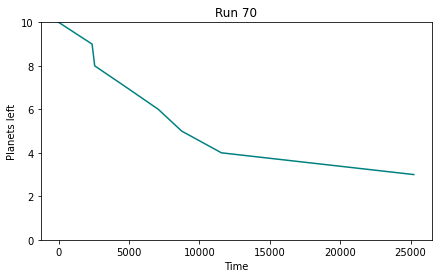

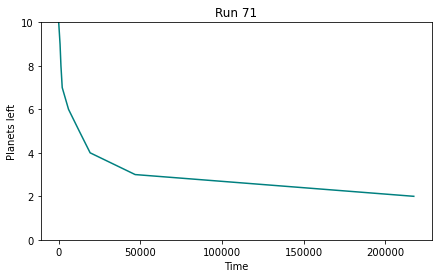

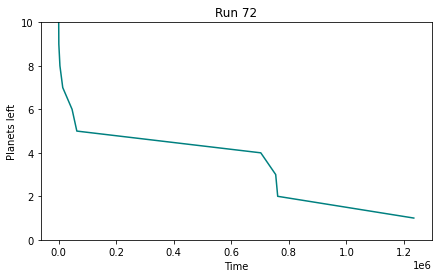

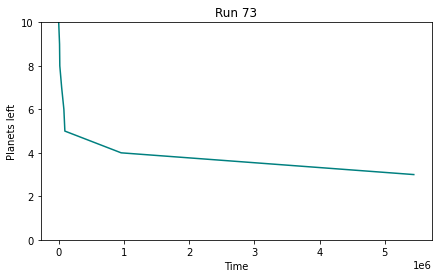

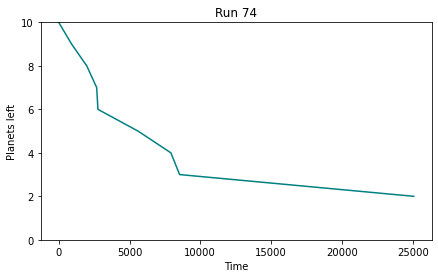

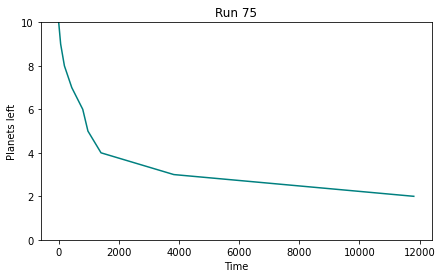

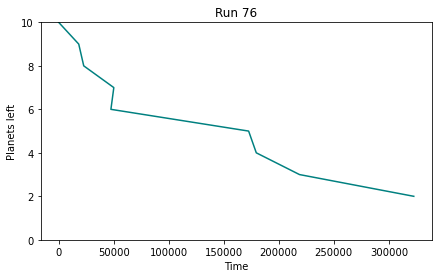

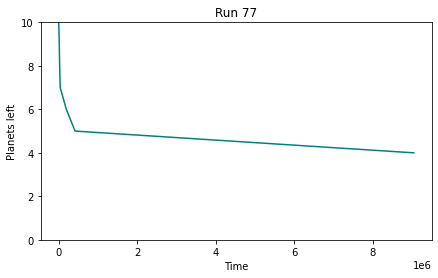

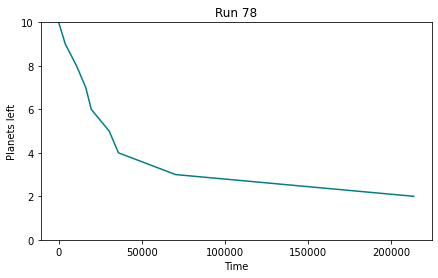

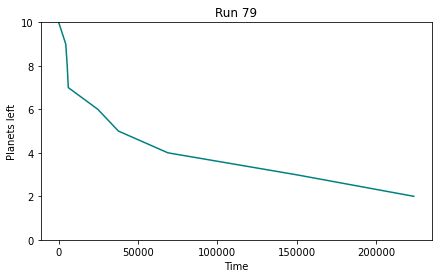

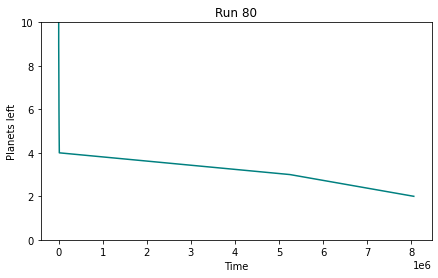

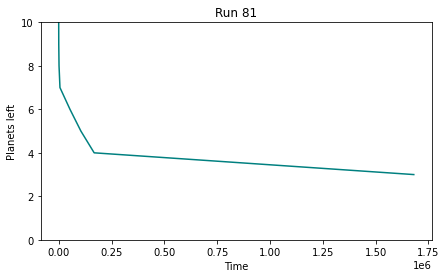

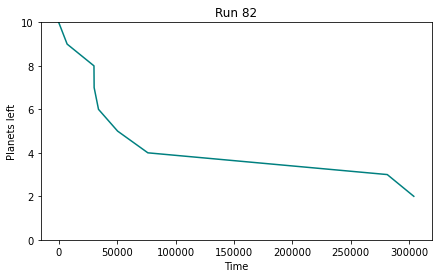

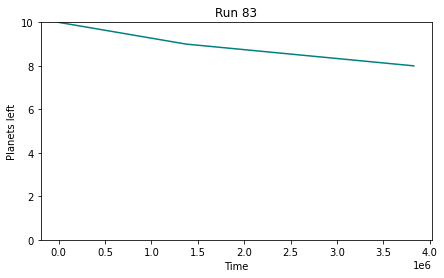

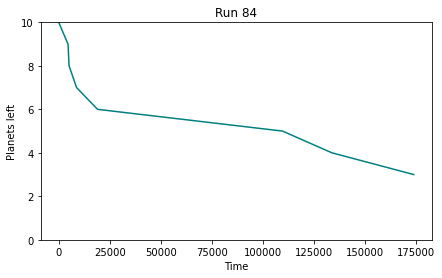

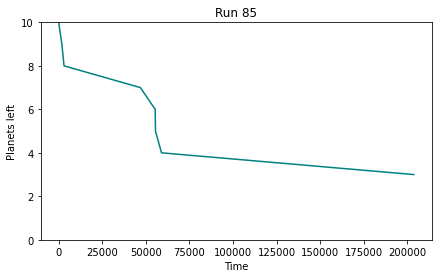

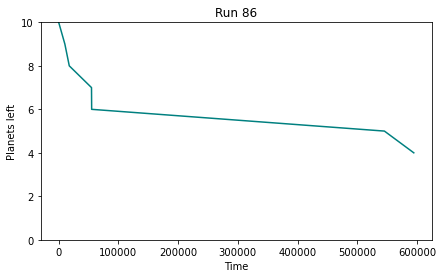

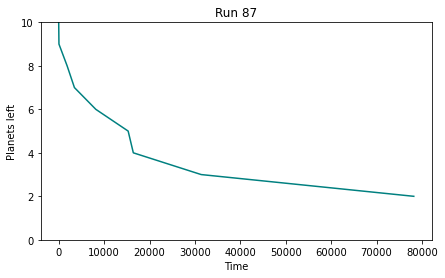

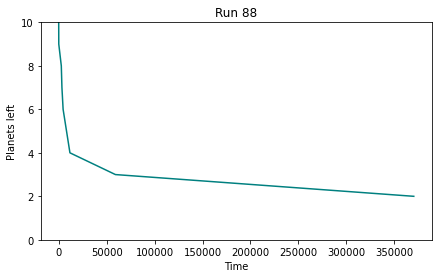

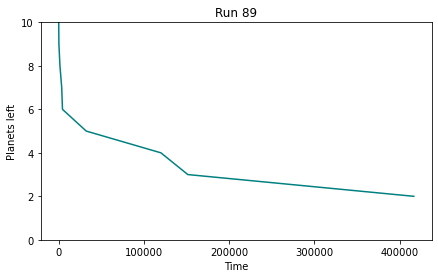

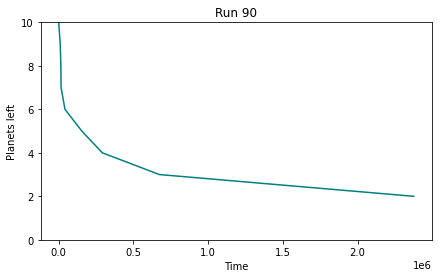

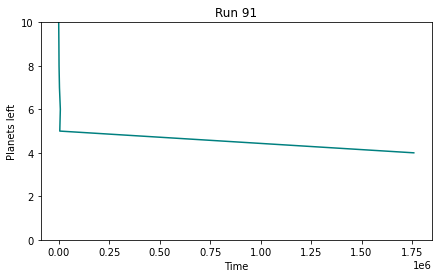

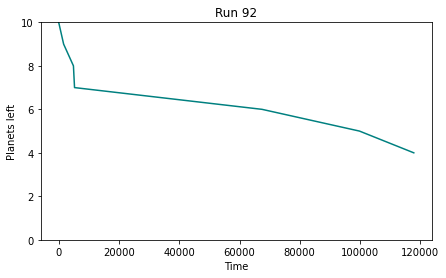

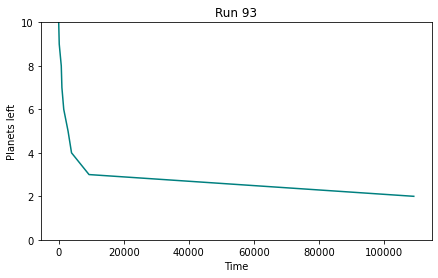

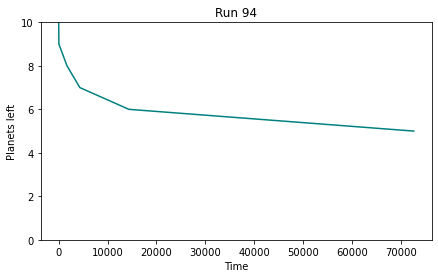

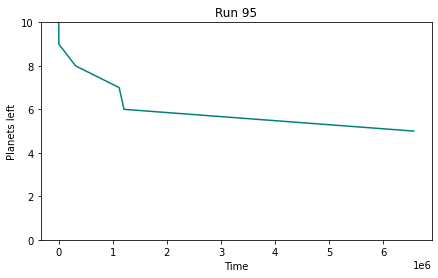

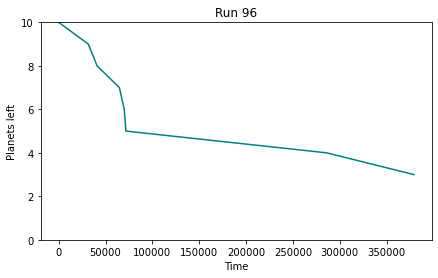

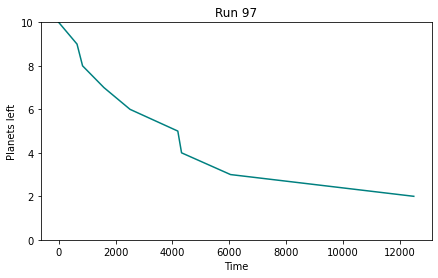

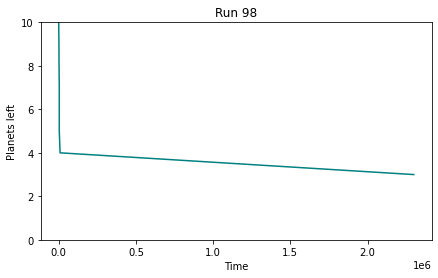

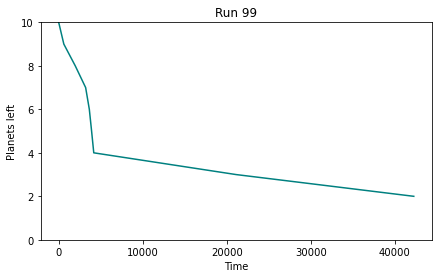

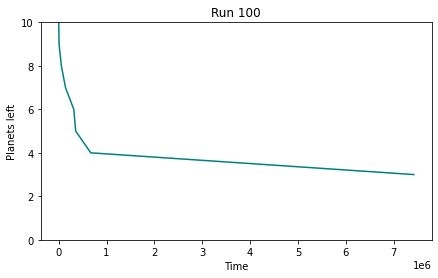

In [111]:
import numpy as np

for i in range(1, 101):
    run = runs[i]
    f=plt.figure(figsize=(7,4))
    
    plt.xlabel('Time')
    plt.ylabel('Planets left')
    plt.title('Run ' + str(i))
    plt.ylim(0,10)
    
    plt.plot(run['x'], run['y'], color = 'teal')
    
    plt.show()
    # plt.savefig('run' + str(i) + '.png')
    # plt.close

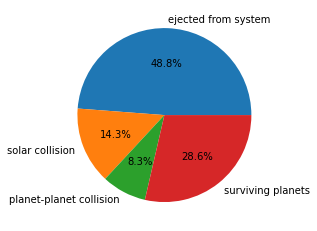

In [115]:
plt.figure()
plt.pie(fates, labels=labels, autopct='%1.1f%%')
plt.show()